# Assignment 1 Homework 3          

In [1]:
from __future__ import print_function

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## choose which distributions to use 

In [2]:
distributions = ['Chi-Squared', 'Normal', 'Poisson', 'Binomial', 'Exponential']

## give numpy as seed for this code to be reproducible

In [3]:
np.random.seed(950)

## and which mean to give it

In [4]:
mymean = 100

## reference: numpy random sampling package
http://docs.scipy.org/doc/numpy/reference/routines.random.html

## I am making a dictionary to host the distributions.

In [5]:
md = {}

## Define the sizes of distributions (all integers between 10 and 2000)

In [6]:
#mysize = (2000 / (np.array(range(1, 100)))).astype(int)
mysize = (2000 / (np.array(range(1, 100) + [10]))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20  200] (100,)


# Now let's do it for 100 Chisq distributions

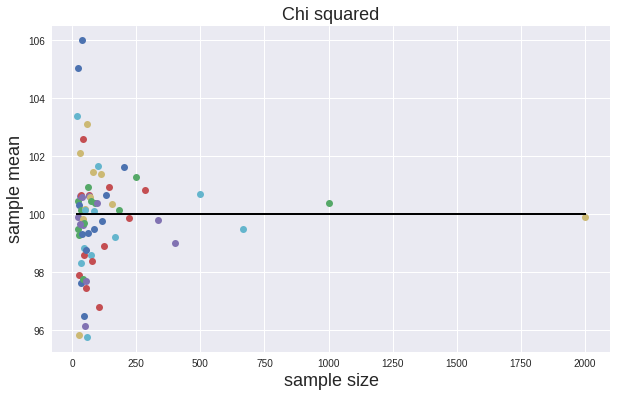

In [7]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of different sizes)

md['chisq'] = {} 

# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 1: sample mean values for 100 samples of Chi-Squared distribution with different sizes
### I found that the larger the smaple size is, the sample mean is closer to the population mean

## now the histogram of the mean of all samples: 

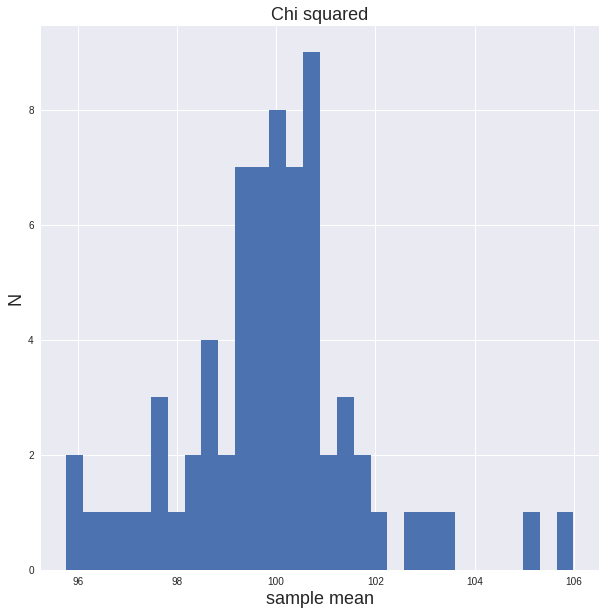

In [8]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Chi squared', fontsize=18)

### Figure 2: sample mean distribution for 100 samples of Chi-Squared distribution with different sizes
### I found that the dristribution of sample means approximates the normal distribution with mean 100

# Do it for the Normal distribution


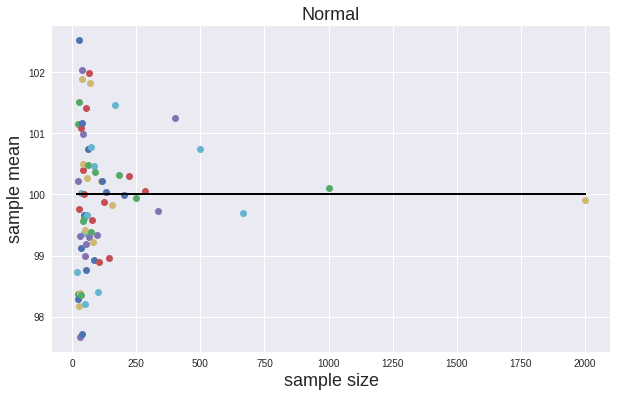

In [9]:
md['lnorm'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['lnorm'][n] = np.random.normal(mymean, 9,size = n)
# save the means for plotting later    

md['lnorm']['means'] = {}
axlnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['lnorm']:
    if not type(nn) == str:
        md['lnorm']['means'][nn] = md['lnorm'][nn].mean()
        #and plot it
        axlnorm_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')
        axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axlnorm_mu_n.set_title('Normal', fontsize=18)
        axlnorm_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

### Figure 3: sample mean values for 100 samples of Normal distribution with different sizes
### I found that the larger the smaple size is, the sample mean is closer to the population mean

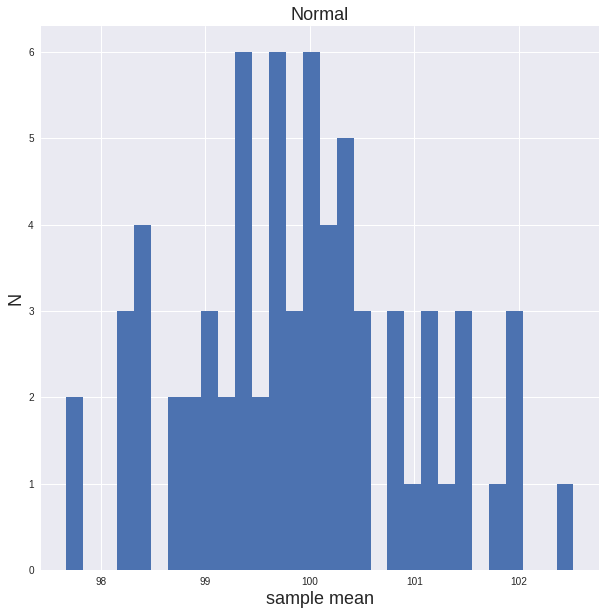

In [10]:
allmeans = list(md['lnorm']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Normal', fontsize=18)

### Figure 4: sample mean distribution for 100 samples of Normal distribution with different sizes
### I found that the dristribution of sample means approximates the normal distribution with mean 100

# Do it for the Poisson distribution

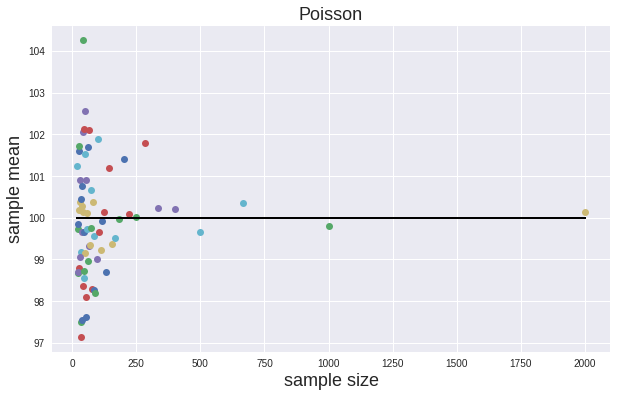

In [11]:
md['pois'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['pois'][n] = np.random.poisson(mymean,size = n)
# save the means for plotting later    

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

### Figure 5: sample mean values for 100 samples of Poisson distribution with different sizes
### I found that the larger the smaple size is, the sample mean is closer to the population mean

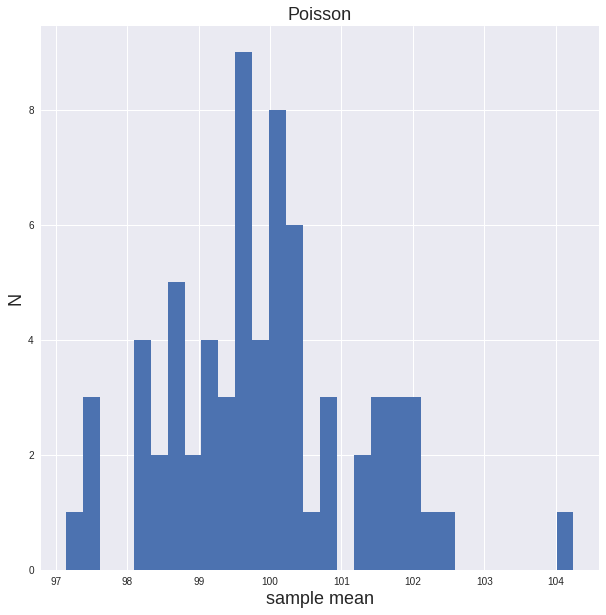

In [12]:
allmeans = list(md['pois']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Poisson', fontsize=18)

### Figure 6: sample mean distribution for 100 samples of Poisson distribution with different sizes
### I found that the dristribution of sample means approximates the normal distribution with mean 100

# Do it for the Binomial distribution

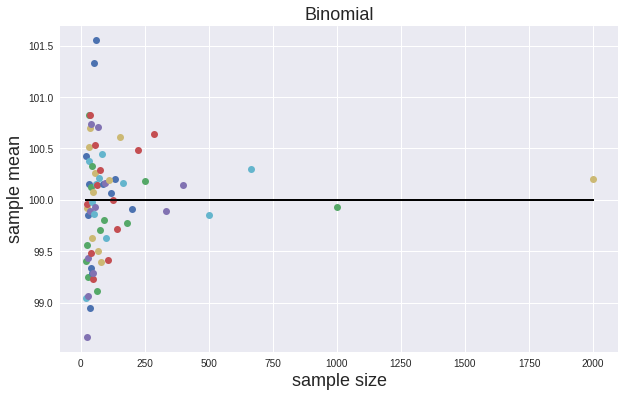

In [13]:
md['binomial'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['binomial'][n] = np.random.binomial(125, 0.8, size = n)
# save the means for plotting later    

md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

### Figure 7: sample mean values for 100 samples of Binomial distribution with different sizes
### I found that the larger the smaple size is, the sample mean is closer to the population mean

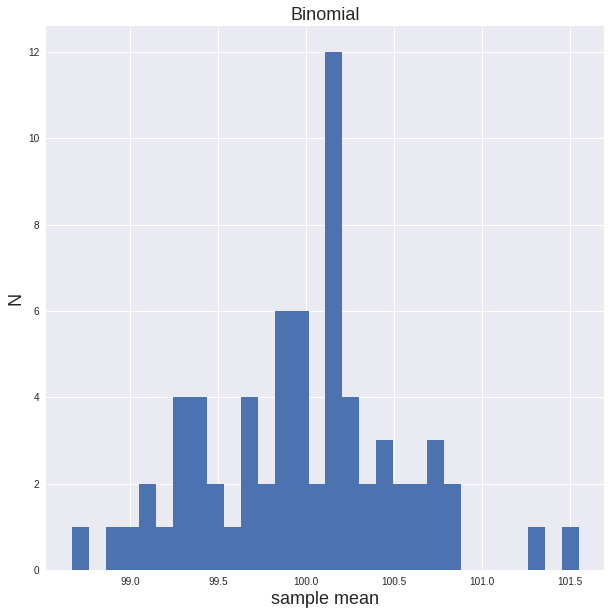

In [14]:
allmeans = list(md['binomial']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Binomial', fontsize=18)

### Figure 8: sample mean distribution for 100 samples of Binomial distribution with different sizes
### I found that the dristribution of sample means approximates the normal distribution with mean 100

# Do it for exponential distribution

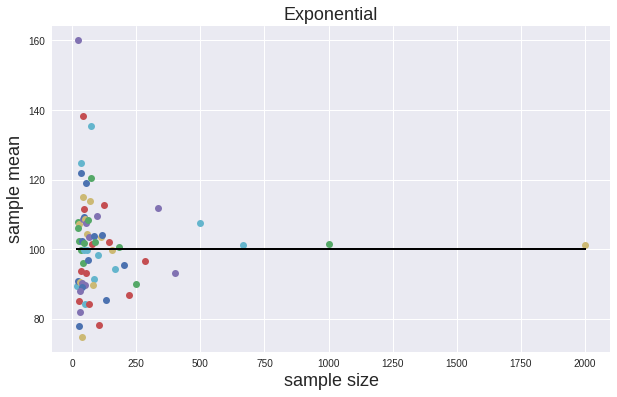

In [15]:
md['exponential'] = {} 
#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['exponential'][n] = np.random.exponential(100, size = n)
# save the means for plotting later    

md['exponential']['means'] = {}
axexponential_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['exponential']:
    if not type(nn) == str:
        md['exponential']['means'][nn] = md['exponential'][nn].mean()
        #and plot it
        axexponential_mu_n.plot(nn, md['exponential']['means'][nn], 'o')
        axexponential_mu_n.set_xlabel('sample size', fontsize=18)
        axexponential_mu_n.set_ylabel('sample mean', fontsize=18)
        axexponential_mu_n.set_title('Exponential', fontsize=18)
        axexponential_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

### Figure 9: sample mean values for 100 samples of Exponential distribution with different sizes
### I found that the larger the smaple size is, the sample mean is closer to the population mean

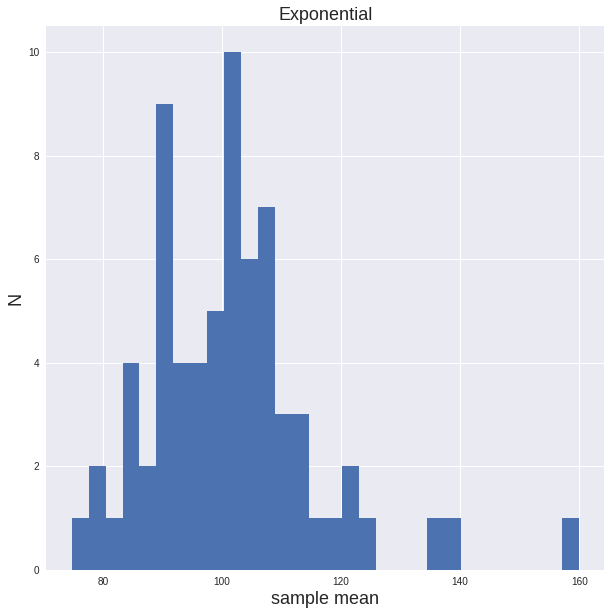

In [16]:
allmeans = list(md['exponential']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Exponential', fontsize=18)

### Figure 10: sample mean distribution for 100 samples of Exponential distribution with different sizes
### I found that the dristribution of sample means approximates the normal distribution with mean 100

## Extra Credit: FIT a gaussian to the distribution of means   

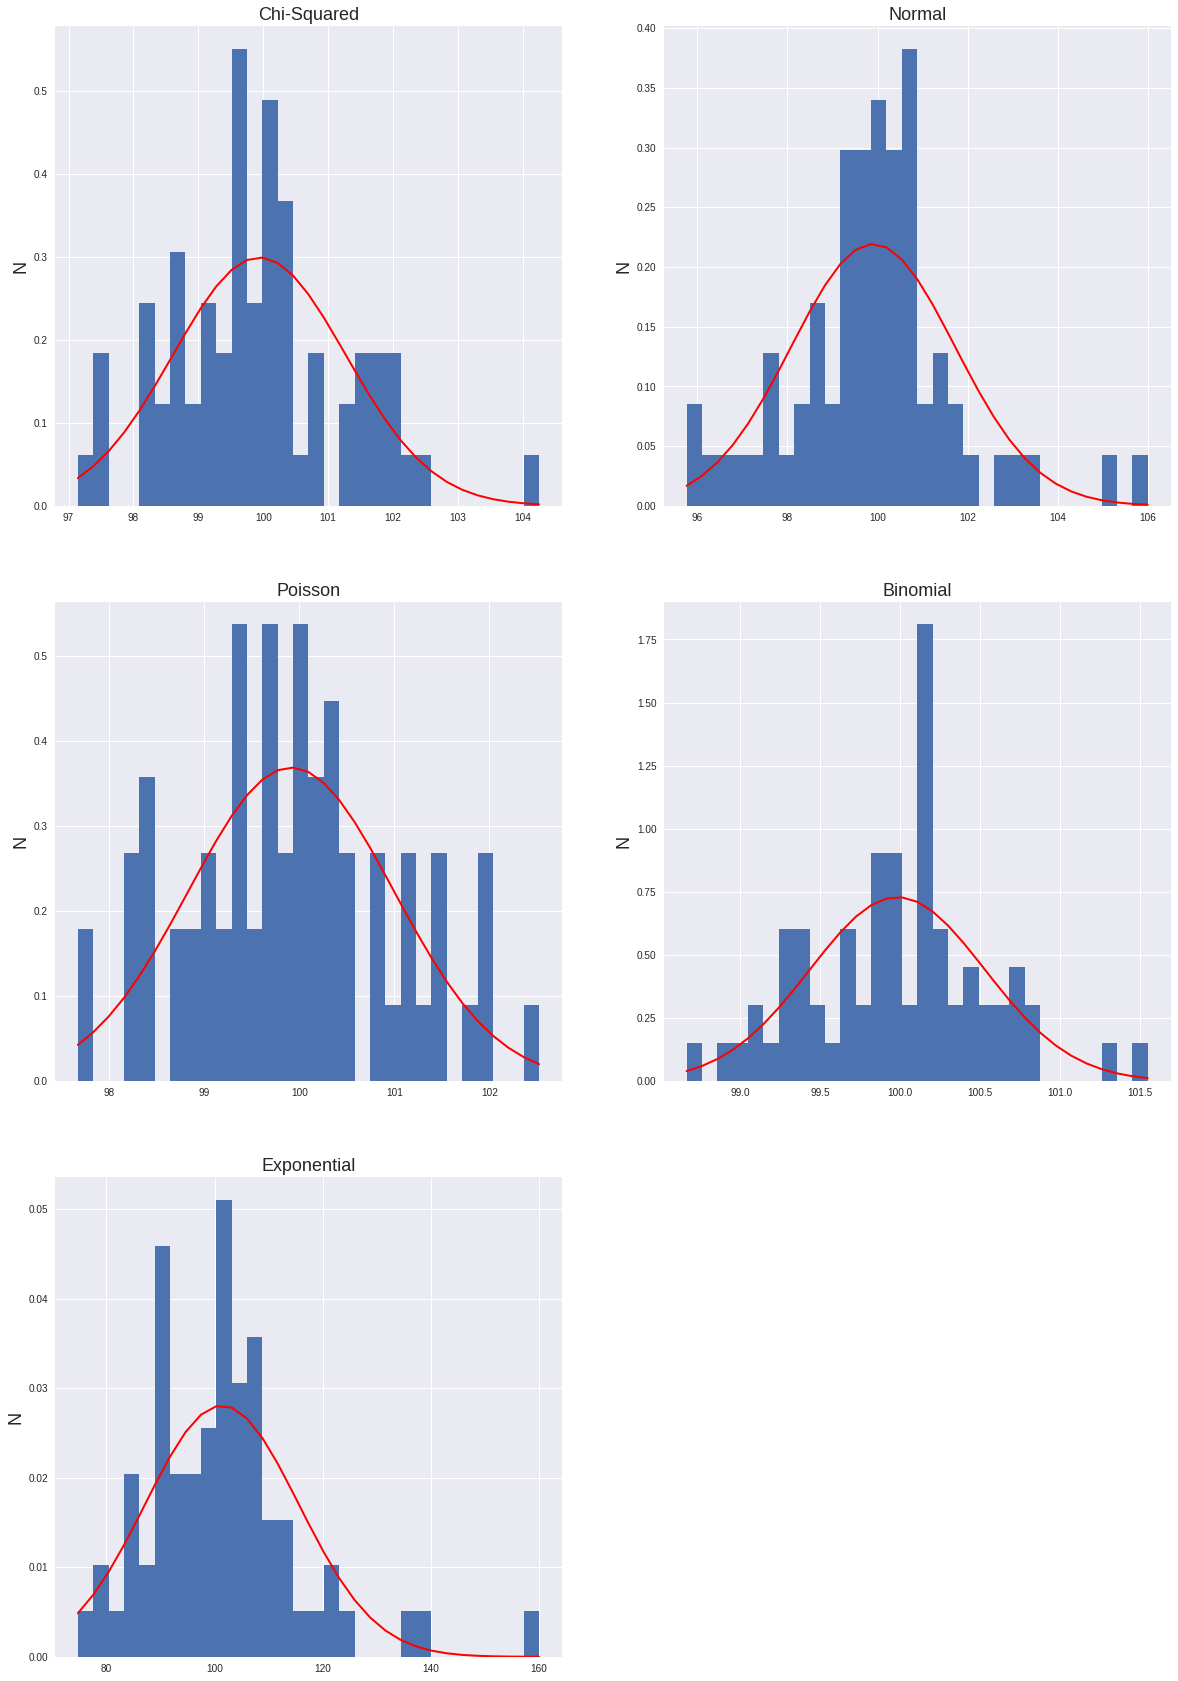

In [17]:
pl.figure(figsize=(20, 30))
distributions = ['Chi-Squared', 'Normal', 'Poisson', 'Binomial', 'Exponential']
i = 1
for k in md:
    ax = subplot(3, 2, i)
    allmeans = list(md[k]['means'].values())
    count, bins, ignored = plt.hist(allmeans, 30, normed=True)
    mumeans = np.mean(allmeans)
    stdmeans = np.std(allmeans)
    plt.plot(bins, 1/(stdmeans * np.sqrt(2 * np.pi)) * np.exp( - (bins - mumeans)**2 / (2 * stdmeans**2) ), linewidth=2, color='r')
    ax.set_title(distributions[i-1], fontsize = 18)
    ax.set_ylabel('sample mean', fontsize = 18)
    ax.set_ylabel('N', fontsize = 18)
    i += 1